In [2]:
# Author: Banafsheh Khazali
# Date: Feb 06, 2023

C.elegans neuronal activity classification for forward crawlig motion. You can fine the code to the simulation in this repository (simulation part). 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import join, isfile
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
import lightgbm as lgb

## Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


The data is in csv format files and they are zipped. To unzip use this code.

In [13]:
# !unzip -q "/content/drive/My Drive/Classification/synth_csv.zip" -d "/content/drive/My Drive/Classification/synth_csv"


In [14]:
# !unzip -q "/content/drive/My Drive/Classification/synth_csv_yes.zip" -d "/content/drive/My Drive/Classification/synth_csv_yes"


In [4]:
import os

folder1_path = "/content/drive/My Drive/no/"
folder2_path = "/content/drive/My Drive/yes/"

files_folder1 = [f for f in os.listdir(folder1_path) if os.path.isfile(os.path.join(folder1_path, f))]
files_folder2 = [f for f in os.listdir(folder2_path) if os.path.isfile(os.path.join(folder2_path, f))]

print("Files in folder 1:", files_folder1)
print("Files in folder 2:", files_folder2)


Files in folder 1: ['syn_0_new.npy.csv', 'syn_0_new600n0.csv', 'syn_0_new600n1.csv', 'syn_0_new600n2.csv', 'syn_0_new600n3.csv']
Files in folder 2: ['syn_0_new.npy.csv', 'syn_0_new600y0.csv', 'syn_0_new600y1.csv', 'syn_0_new600y2.csv', 'syn_0_new600y3.csv']


In [5]:
yesFile = folder2_path
noFile = folder1_path

In [6]:
files = [f for f in os.listdir(yesFile) if f.endswith(".csv")]

if not files:
    print("No csv files found in the folder.")
else:
    first_file = files[0]
    first_file_path = os.path.join(yesFile, first_file)
    df = pd.read_csv(first_file_path)
df.head()

,time,IL2DL,IL2VL,IL2L,URADL,IL1VL,IL2DR,IL1DL,OLLL,IL1L,...,PVWL,PVWR,PLNL,PHCR,PHCL,PVNR,PLMR,PVNL,PLML,label
0,2023-02-07 11:47:53.932879,1.168066,0.063576,0.317555,0.062453,0.030277,1.159660,0.072322,0.035368,0.045298,...,52.404971,-39.128779,-0.841900,0.056864,-3.515775,-0.132885,-168.058175,1.752842,-50.532541,1
1,2023-02-07 11:47:54.932895,1.092734,0.066125,0.303237,0.085859,0.030872,1.084870,0.066989,0.026858,0.043098,...,53.218946,-39.289763,-0.812735,0.046048,-3.755490,-0.130671,-149.384755,1.522040,-52.083307,1
2,2023-02-07 11:47:55.932897,1.022260,0.068147,0.289261,0.107788,0.031572,1.014903,0.062297,0.019274,0.041218,...,54.023755,-39.461674,-0.784354,0.043899,-3.984051,-0.128970,-129.610625,1.296637,-53.663883,1
3,2023-02-07 11:47:56.932899,0.956330,0.069674,0.275751,0.128365,0.032381,0.949448,0.058223,0.012611,0.039654,...,54.790790,-39.642459,-0.756771,0.049169,-4.204916,-0.127736,-108.922121,1.077057,-55.273464,1
4,2023-02-07 11:47:57.932901,0.894653,0.070739,0.262757,0.147661,0.033291,0.888215,0.054727,0.006807,0.038396,...,55.395548,-39.845249,-0.729992,0.047342,-4.426307,-0.126927,-87.620554,0.863104,-56.929035,1


## Classification

The purpose of this section is to use supervised classifiers to classify neuronal activities. We start by using traditional machine learning algorithms and we extract the most important features(neurons) then.

## Supervised learning classifiers

in the first section,  **logistic regression**, **decision tree**, **random forest**, **k-nearesr neighbor** and **svm** classifiers are used to classify the data in two classes of 0 and 1. 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


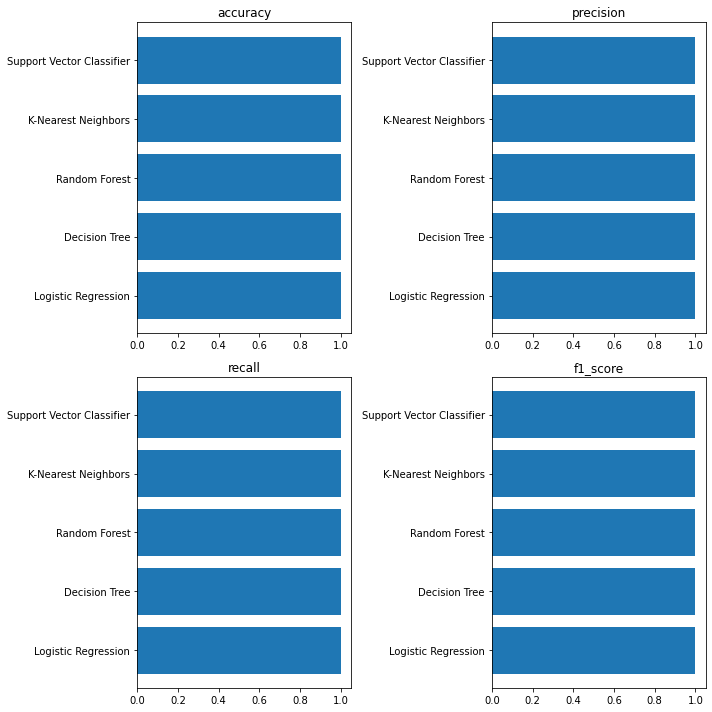

In [7]:

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(kernel='linear', random_state=0)
]

classifier_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Support Vector Classifier'
]

results = {}

for classifier, name in zip(classifiers, classifier_names):
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.ravel()

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
  values = [results[name][metric] for name in classifier_names]
  ax[i].barh(classifier_names, values)
  ax[i].set_title(metric)

plt.tight_layout()
plt.show()


No we calculate the performance and plot the confusion matrices.

Classifier: LogisticRegression
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

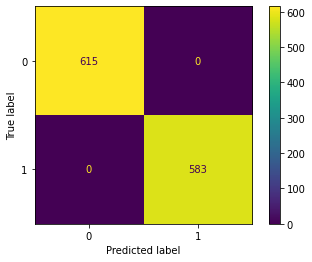

Classifier: KNeighborsClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

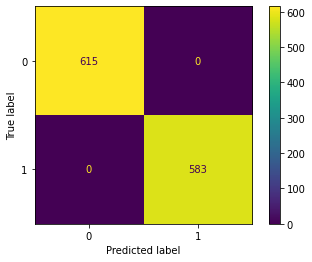

Classifier: SVC
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

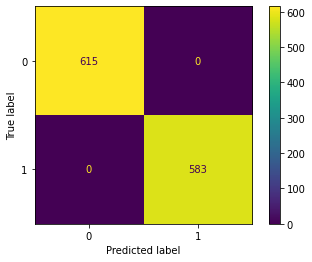

Classifier: DecisionTreeClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

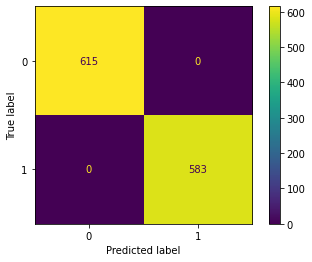

Classifier: RandomForestClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

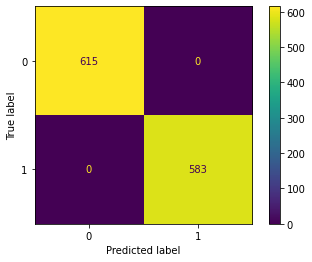

In [8]:
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# iterate over the classifiers and fit, predict and evaluate
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Classifier:", clf.__class__.__name__)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*60)
    
    # plot the confusion matrix
    plt.figure(figsize=(7, 7))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=['0', '1'])
    plt.show()


This time dataset will be devided into train, test, and validation set.


In [9]:
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)

# Train the classifiers
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Evaluate the classifiers on the validation set
dt_val_score = dt.score(X_val, y_val)
rf_val_score = rf.score(X_val, y_val)
lr_val_score = lr.score(X_val, y_val)
svm_val_score = svm.score(X_val, y_val)

print('Validation set scores:')
print('Decision tree: {:.3f}'.format(dt_val_score))
print('Random forest: {:.3f}'.format(rf_val_score))
print('Logistic regression: {:.3f}'.format(lr_val_score))
print('SVM: {:.3f}'.format(svm_val_score))

# Select the best classifier based on the validation score
best_clf = max(dt_val_score, rf_val_score, lr_val_score, svm_val_score)

if best_clf == dt_val_score:
    clf = dt
    clf_name = 'Decision tree'
elif best_clf == rf_val_score:
    clf = rf
    clf_name = 'Random forest'
elif best_clf == lr_val_score:
    clf = lr
    clf_name = 'Logistic regression'
else:
    clf = svm
    clf_name = 'SVM'

# Evaluate the best classifier on the test set
test_score = clf.score(X_test, y_test)
print('\nTest set score ({0}): {1:.3f}'.format(clf_name, test_score))


Validation set scores:
Decision tree: 1.000
Random forest: 1.000
Logistic regression: 1.000
SVM: 1.000

Test set score (Decision tree): 1.000


Validation set scores:
Decision tree: 1.000
Random forest: 1.000
Logistic regression: 1.000
SVM: 1.000
KNN: 1.000
Test set score (Decision tree) : 1.000
Confusion matrix:
[[615   0]
 [  0 583]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       583

    accuracy                           1.00      1198
   macro avg       1.00      1.00      1.00      1198
weighted avg       1.00      1.00      1.00      1198



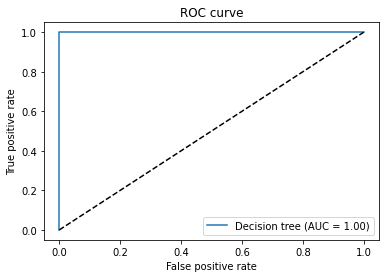

In [10]:
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
knn = KNeighborsClassifier()

# Train the classifiers
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Evaluate the classifiers on the validation set
dt_val_score = dt.score(X_val, y_val)
rf_val_score = rf.score(X_val, y_val)
lr_val_score = lr.score(X_val, y_val)
svm_val_score = svm.score(X_val, y_val)
knn_val_score = knn.score(X_val, y_val)

print('Validation set scores:')
print('Decision tree: {:.3f}'.format(dt_val_score))
print('Random forest: {:.3f}'.format(rf_val_score))
print('Logistic regression: {:.3f}'.format(lr_val_score))
print('SVM: {:.3f}'.format(svm_val_score))
print('KNN: {:.3f}'.format(knn_val_score))

# Select the best classifier based on the validation score
best_clf = max(dt_val_score, rf_val_score, lr_val_score, svm_val_score, knn_val_score)

if best_clf == dt_val_score:
    clf = dt
    clf_name = 'Decision tree'
elif best_clf == rf_val_score:
    clf = rf
    clf_name = 'Random forest'
elif best_clf == lr_val_score:
    clf = lr
    clf_name = 'Logistic regression'
elif best_clf == svm_val_score:
    clf = svm
    clf_name = 'SVM'
else:
    clf = knn
    clf_name = 'KNN'


#Evaluate the best classifier on the testing set
test_score = clf.score(X_test, y_test)
print('Test set score ({}) : {:.3f}'.format(clf_name, test_score))

#Predict the labels of the testing set
y_pred = clf.predict(X_test)


#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

#Calculate precision, recall, f1-score, and accuracy for the testing set
print('Classification report:')
print(classification_report(y_test, y_pred))
   
# plot the ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(clf_name, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [13]:


def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the classifiers and their hyperparameters
classifiers = {
    'Logistic Regression': {
        'classifier': LogisticRegression(max_iter=1000),
        'hyperparameters': {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'Ridge Classifier': {
        'classifier': RidgeClassifier(max_iter=1000),
        'hyperparameters': {
            'alpha': [0.01, 0.1, 1, 10],
            'normalize': [True, False]
        }
    },
    'KNN': {
        'classifier': KNeighborsClassifier(),
        'hyperparameters': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute']
        }
    },
    'Decision Tree': {
        'classifier': DecisionTreeClassifier(),
        'hyperparameters': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 4, 5],
            'min_samples_split': [2, 3, 4, 5]
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 4, 5],
            'min_samples_split': [2, 3, 4, 5]
        }
    }
}



Training Logistic Regression...


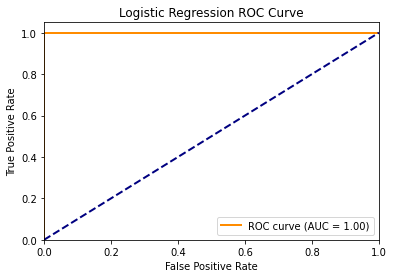

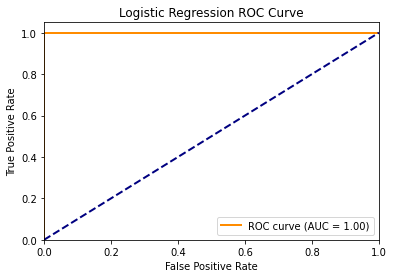

Training Ridge Classifier...


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

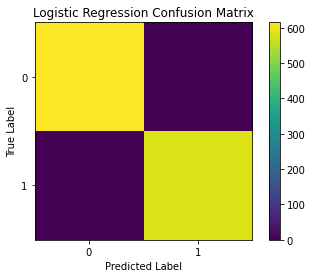

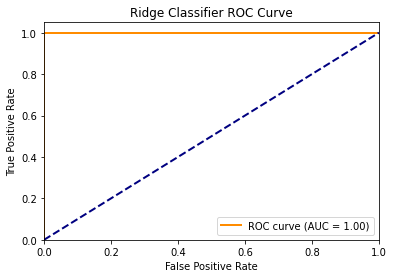

Training KNN...


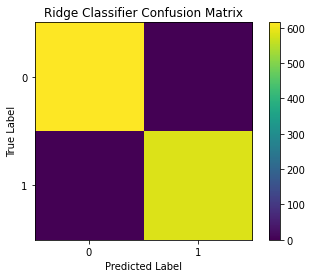

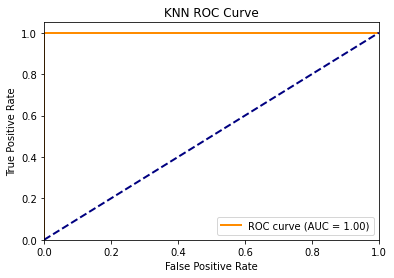

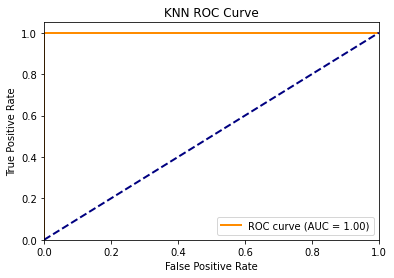

Training Decision Tree...


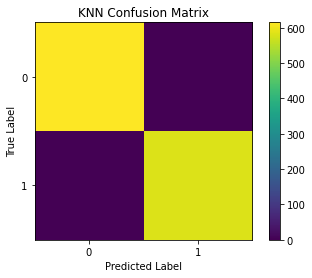

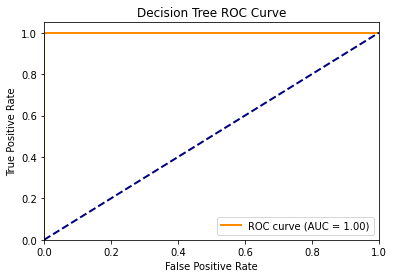

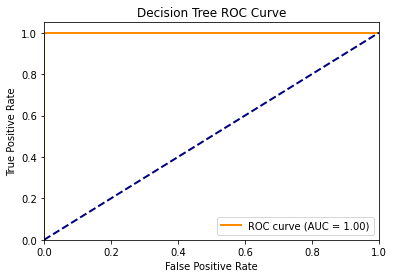

Training Random Forest...


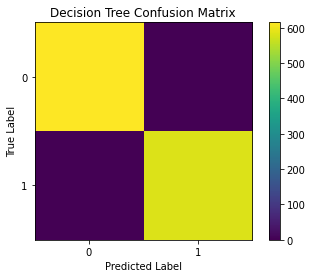

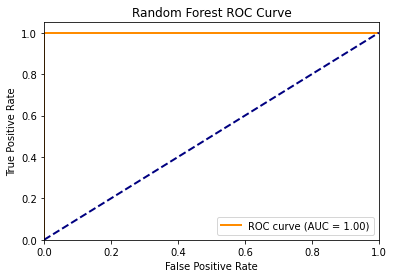

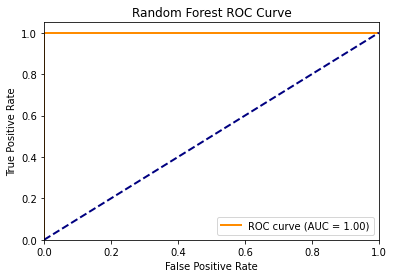

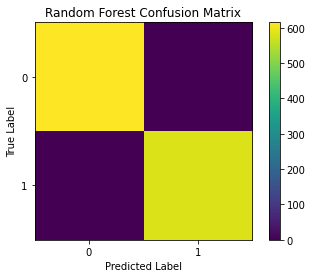

In [17]:
results = {'classifier': [], 'parameters': [], 'precision_train': [], 'recall_train': [], 'f1_train': [],
           'accuracy_train': [], 'precision_val': [], 'recall_val': [], 'f1_val': [], 'accuracy_val': [],
           'precision_test': [], 'recall_test': [], 'f1_test': [], 'accuracy_test': [], 'roc_auc': []}

for name, classifier in classifiers.items():
    print(f'Training {name}...')
    clf = classifier['classifier']
    hyperparameters = classifier['hyperparameters']
    clf_cv = GridSearchCV(clf, hyperparameters, cv=5)
    clf_cv.fit(X_train, y_train)
    
    y_train_pred = clf_cv.predict(X_train)
    y_val_pred = clf_cv.predict(X_val)
    y_test_pred = clf_cv.predict(X_test)
    
    precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')
    precision_val, recall_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    results['classifier'].append(name)
    results['parameters'].append(clf_cv.best_params_)
    results['precision_train'].append(precision_train)
    results['recall_train'].append(recall_train)
    results['f1_train'].append(f1_train)
    results['accuracy_train'].append(accuracy_train)
    results['precision_val'].append(precision_val)
    results['recall_val'].append(recall_val)
    results['f1_val'].append(f1_val)
    results['accuracy_val'].append(accuracy_val)
    results['precision_test'].append(precision_test)
    results['recall_test'].append(recall_test)
    results['f1_test'].append(f1_test)
    results['accuracy_test'].append(accuracy_test)
    
    if hasattr(clf, 'predict_proba'):
        y_test_proba = clf_cv.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
        roc_auc = auc(fpr, tpr)
        results['roc_auc'].append(roc_auc)
        
        # Plot the ROC curve
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        y_test_scores = clf_cv.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
    
        roc_auc = auc(fpr, tpr)
        results['roc_auc'].append(roc_auc)
    
    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')


In [18]:
# Print the results
results_df = pd.DataFrame(results)
print(results_df)

# Display the evaluation metrics as a table
evaluation_metrics = ['precision_train', 'recall_train', 'f1_train', 'accuracy_train', 'precision_val',
'recall_val', 'f1_val', 'accuracy_val', 'precision_test', 'recall_test', 'f1_test',
'accuracy_test', 'roc_auc']
summary_table = results_df.groupby('classifier')[evaluation_metrics].max().reset_index()
summary_table = summary_table.sort_values('roc_auc', ascending=False)
display(summary_table)



            classifier                                         parameters  \
0  Logistic Regression  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...   
1     Ridge Classifier                 {'alpha': 0.01, 'normalize': True}   
2                  KNN  {'algorithm': 'ball_tree', 'n_neighbors': 3, '...   
3        Decision Tree  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
4        Random Forest  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   

   precision_train  recall_train  f1_train  accuracy_train  precision_val  \
0              1.0           1.0       1.0             1.0            1.0   
1              1.0           1.0       1.0             1.0            1.0   
2              1.0           1.0       1.0             1.0            1.0   
3              1.0           1.0       1.0             1.0            1.0   
4              1.0           1.0       1.0             1.0            1.0   

   recall_val  f1_val  accuracy_val  precision_test  recall_test  f1_test 

,classifier,precision_train,recall_train,f1_train,accuracy_train,precision_val,recall_val,f1_val,accuracy_val,precision_test,recall_test,f1_test,accuracy_test,roc_auc
0,Decision Tree,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,KNN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Ridge Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The best classifier is Decision Tree with ROC AUC of 1.00


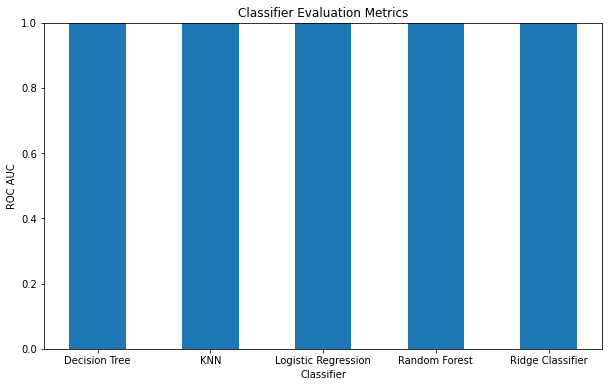

In [19]:
# Show the best classifier based on ROC AUC
best_classifier = summary_table['classifier'][0]
print(f'The best classifier is {best_classifier} with ROC AUC of {summary_table["roc_auc"][0]:.2f}')

# Show the bar plot of the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(summary_table['classifier'], summary_table['roc_auc'], width=0.5)
plt.title('Classifier Evaluation Metrics')
plt.xlabel('Classifier')
plt.ylabel('ROC AUC')
plt.ylim([0.0, 1.0])
plt.show()

## Find the most important features

it is possible to plot the most important features of your data. 

1. One common approach is to use feature importances from tree-based models, such as Random Forest or Gradient Boosting, and plot them using a bar chart or a feature importance plot.

2. Another approach is to use permutation importance, which measures the decrease in model performance when a feature is randomly permuted. 

3. LASSO or Ridge regression to identify the most important features by checking the coefficients of each feature.


1. Random Forest Classifier

Accuracy: 1.0
Confusion Matrix:
 [[615   0]
 [  0 583]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       583

    accuracy                           1.00      1198
   macro avg       1.00      1.00      1.00      1198
weighted avg       1.00      1.00      1.00      1198

[2, 17, 20, 24, 32, 37, 40, 43, 45, 52, 61, 65, 72, 75, 76, 84, 95, 97, 130, 156, 157, 158, 159, 257, 262, 264]
The most important neurons for the classifiction task are:  ['IL2L', 'IL2VR', 'IL1R', 'URBR', 'OLQVR', 'CEPVR', 'RMDVL', 'URXL', 'RMDVR', 'URXR', 'RMDR', 'AWBL', 'ADLR', 'ASIL', 'ASHL', 'RIVL', 'RMFL', 'SIBVR', 'SIAVR', 'RMGL', 'RMGR', 'RIFL', 'AVG', 'PHAR', 'PHBR', 'PHBL']


<Figure size 360x360 with 0 Axes>

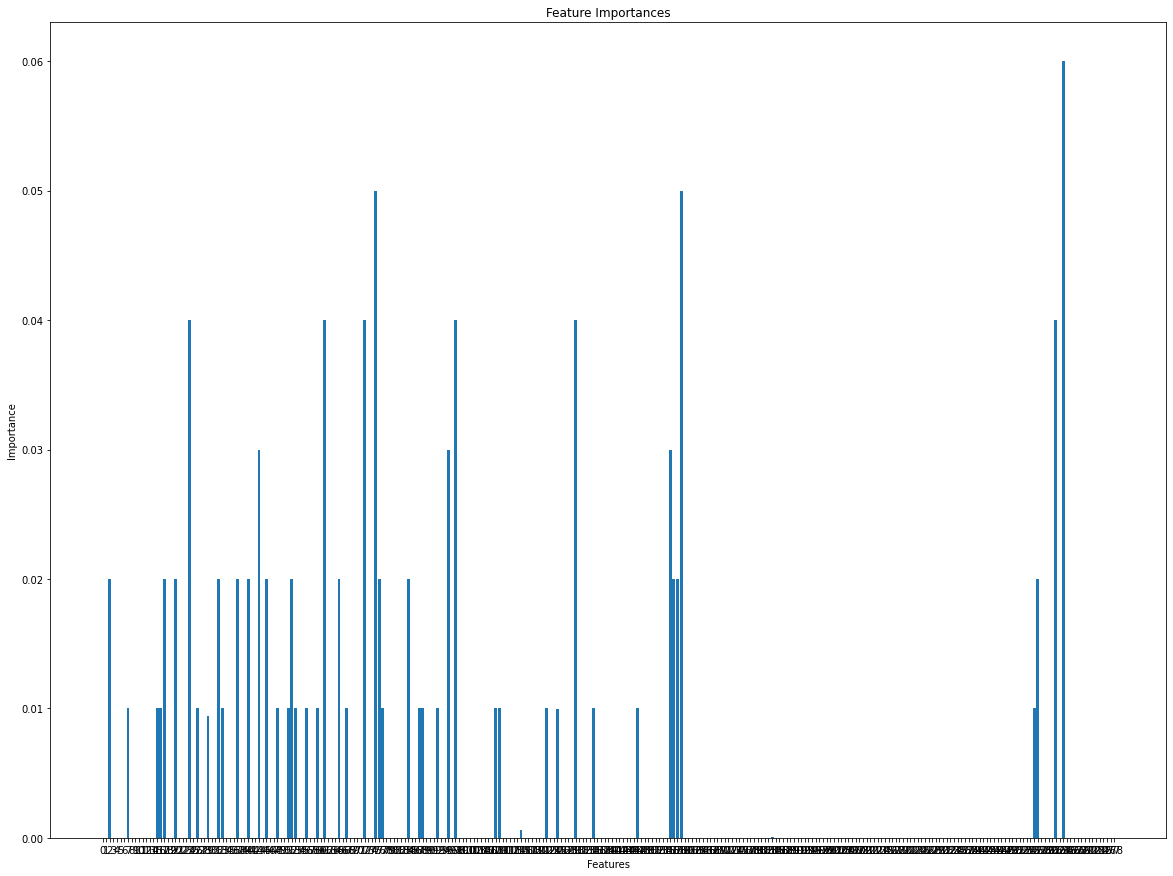

In [23]:
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5,5))
# plt.imshow(confusion_matrix(y_test, y_pred), cmap='binary', interpolation='None')



importances = clf.feature_importances_


# Plot the feature importances
plt.figure(figsize=(20,15))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
# plt.show()


# Get feature importances
true_index = []

importances1 = importances > 0.01
def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
    print(true_index)
   
result = []
neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(importances1)
for i in true_index:
    result.append(neuron_names[i])

print("The most important neurons for the classifiction task are: ", result)







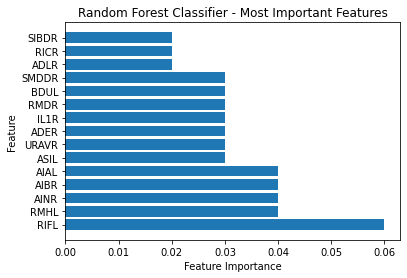

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier on the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Get the index of the most important features
sorted_index = np.argsort(importances)[::-1][:15]

# Plot the most important features
plt.barh(X.columns[sorted_index], importances[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Most Important Features")
plt.show()


2. Gradient Boosting

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       615
           1       1.00      1.00      1.00       583

    accuracy                           1.00      1198
   macro avg       1.00      1.00      1.00      1198
weighted avg       1.00      1.00      1.00      1198



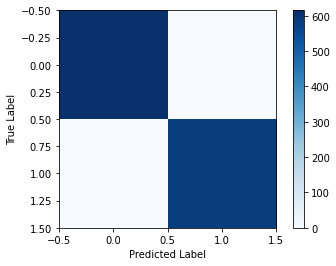

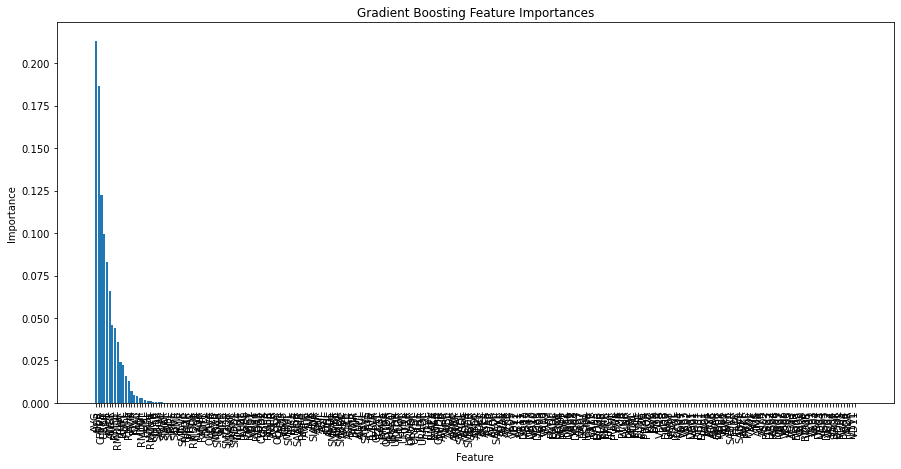

[24, 37, 51, 60, 65, 75, 84, 87, 88, 93, 95, 131, 159]
The most important neurons for the classifiction task are:  ['URBR', 'CEPVR', 'RMDL', 'ADFL', 'AWBL', 'ASIL', 'RIVL', 'RMHL', 'RMDDR', 'AIBR', 'RMFL', 'RICR', 'AVG']


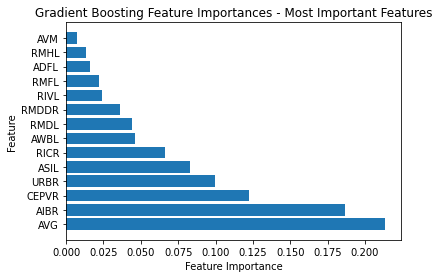

In [26]:
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the feature importances
importances = gb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Gradient Boosting Feature Importances")
plt.show()



# Get feature importances
true_index = []

importances1 = importances > 0.01
def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
    print(true_index)
   
result = []
neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(importances1)
for i in true_index:
    result.append(neuron_names[i])

print("The most important neurons for the classifiction task are: ", result)



sorted_index = np.argsort(importances)[::-1][:14]
# Plot the most important features
plt.barh(X.columns[sorted_index], importances[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Feature Importances - Most Important Features")
plt.show()


3. Lasso or Ridge model

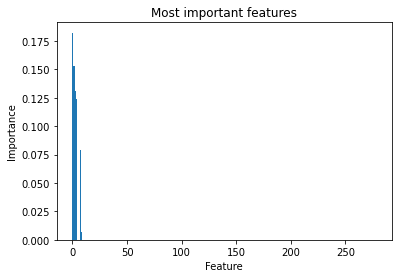

In [29]:
# Load the csv files from the two folders and combine them into a single dataframe

files1 = [yesFile + f for f in os.listdir(yesFile) if f.endswith(".csv")]
files2 = [noFile + f for f in os.listdir(noFile) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Lasso(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
imp = np.sort(imp)[::-1]

# Plot the most important features
plt.bar(np.arange(X.shape[1]), imp)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Most important features")
plt.show()

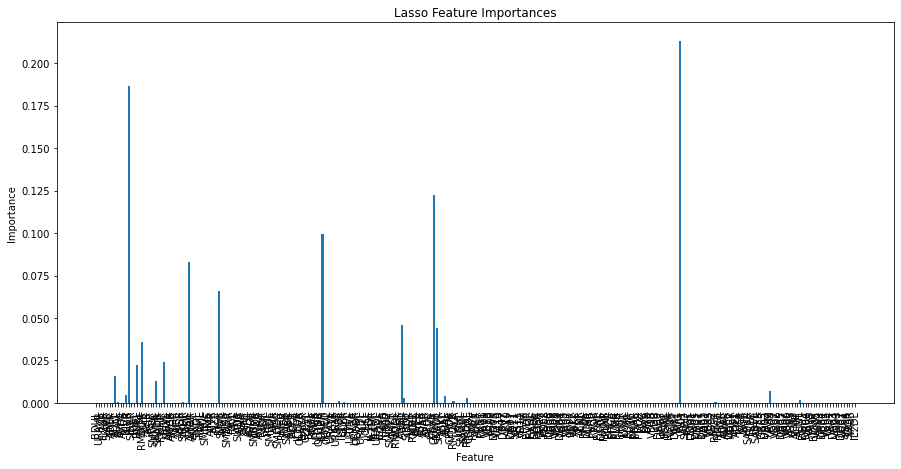

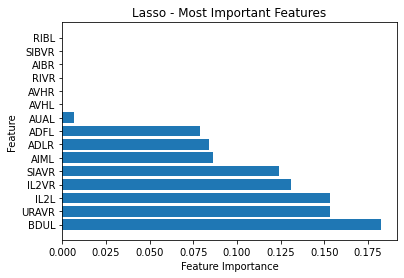

In [30]:
# Load the csv files from the two folders and combine them into a single dataframe
files1 = [yesFile + f for f in os.listdir(yesFile) if f.endswith(".csv")]
files2 = [noFile + f for f in os.listdir(noFile) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Lasso(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
sorted_idx = np.argsort(imp)[::-1]


plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Lasso Feature Importances")
plt.show()


# Get feature importances
true_index = []
result = []

def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
       

neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(imp)
for i in true_index:
    result.append(neuron_names[i])

sorted_index = np.argsort(imp)[::-1][:15]
# Plot the most important features
plt.barh(X.columns[sorted_index], imp[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Lasso - Most Important Features")
plt.show()



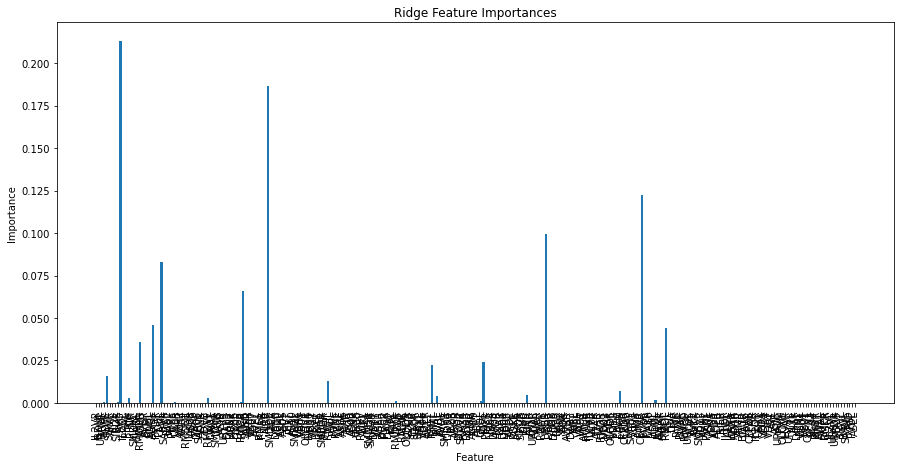

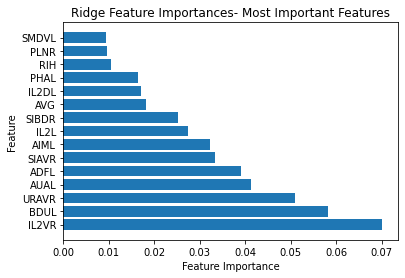

In [31]:
# Load the csv files from the two folders and combine them into a single dataframe
folder1 = yesFile
folder2 = noFile

files1 = [folder1 + f for f in os.listdir(folder1) if f.endswith(".csv")]
files2 = [folder2 + f for f in os.listdir(folder2) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Ridge(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
sorted_idx = np.argsort(imp)[::-1]


plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Ridge Feature Importances")
plt.show()


# Get feature importances
true_index = []
result = []

def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
       

neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(imp)
for i in true_index:
    result.append(neuron_names[i])

sorted_index = np.argsort(imp)[::-1][:15]
# Plot the most important features
plt.barh(X.columns[sorted_index], imp[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Ridge Feature Importances- Most Important Features")
plt.show()

